In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import scipy as sp
import warnings
warnings.filterwarnings('ignore')

In [4]:
diabetes = pd.read_csv('diabetes.csv')

In [5]:
print(diabetes.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [6]:
diabetes.shape

(768, 9)

In [8]:
diabetes.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [11]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
diabetes.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [15]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<AxesSubplot:xlabel='Outcome', ylabel='count'>

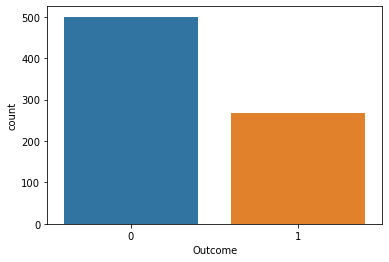

In [17]:
import seaborn as sns
sns.countplot(diabetes['Outcome'],label="Count")

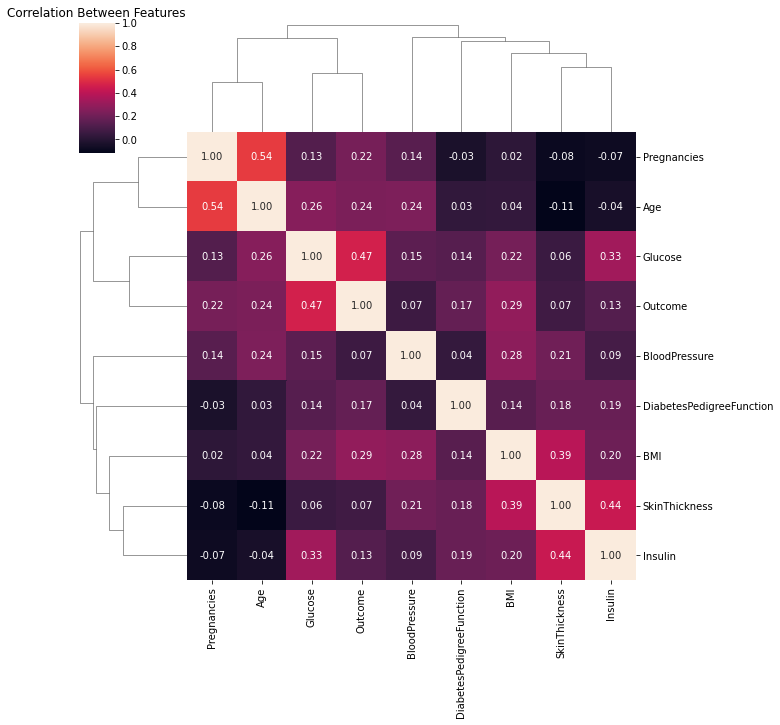

In [19]:
corr_data = diabetes.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show()

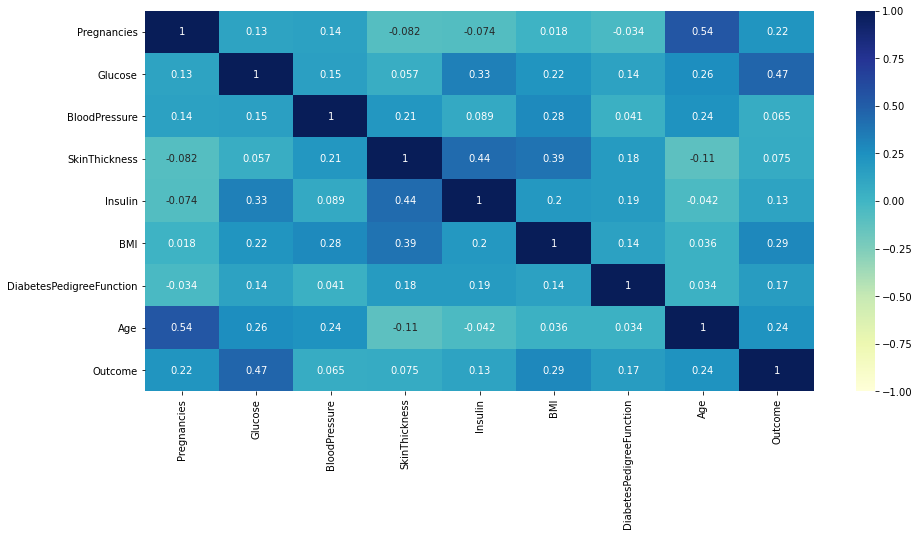

In [20]:
sns.set_palette(sns.color_palette("Set1", 8))
plt.figure(figsize=(15,7))
sns.heatmap(diabetes.corr(),annot=True,vmin=-1,vmax=1,cmap="YlGnBu")
plt.show()

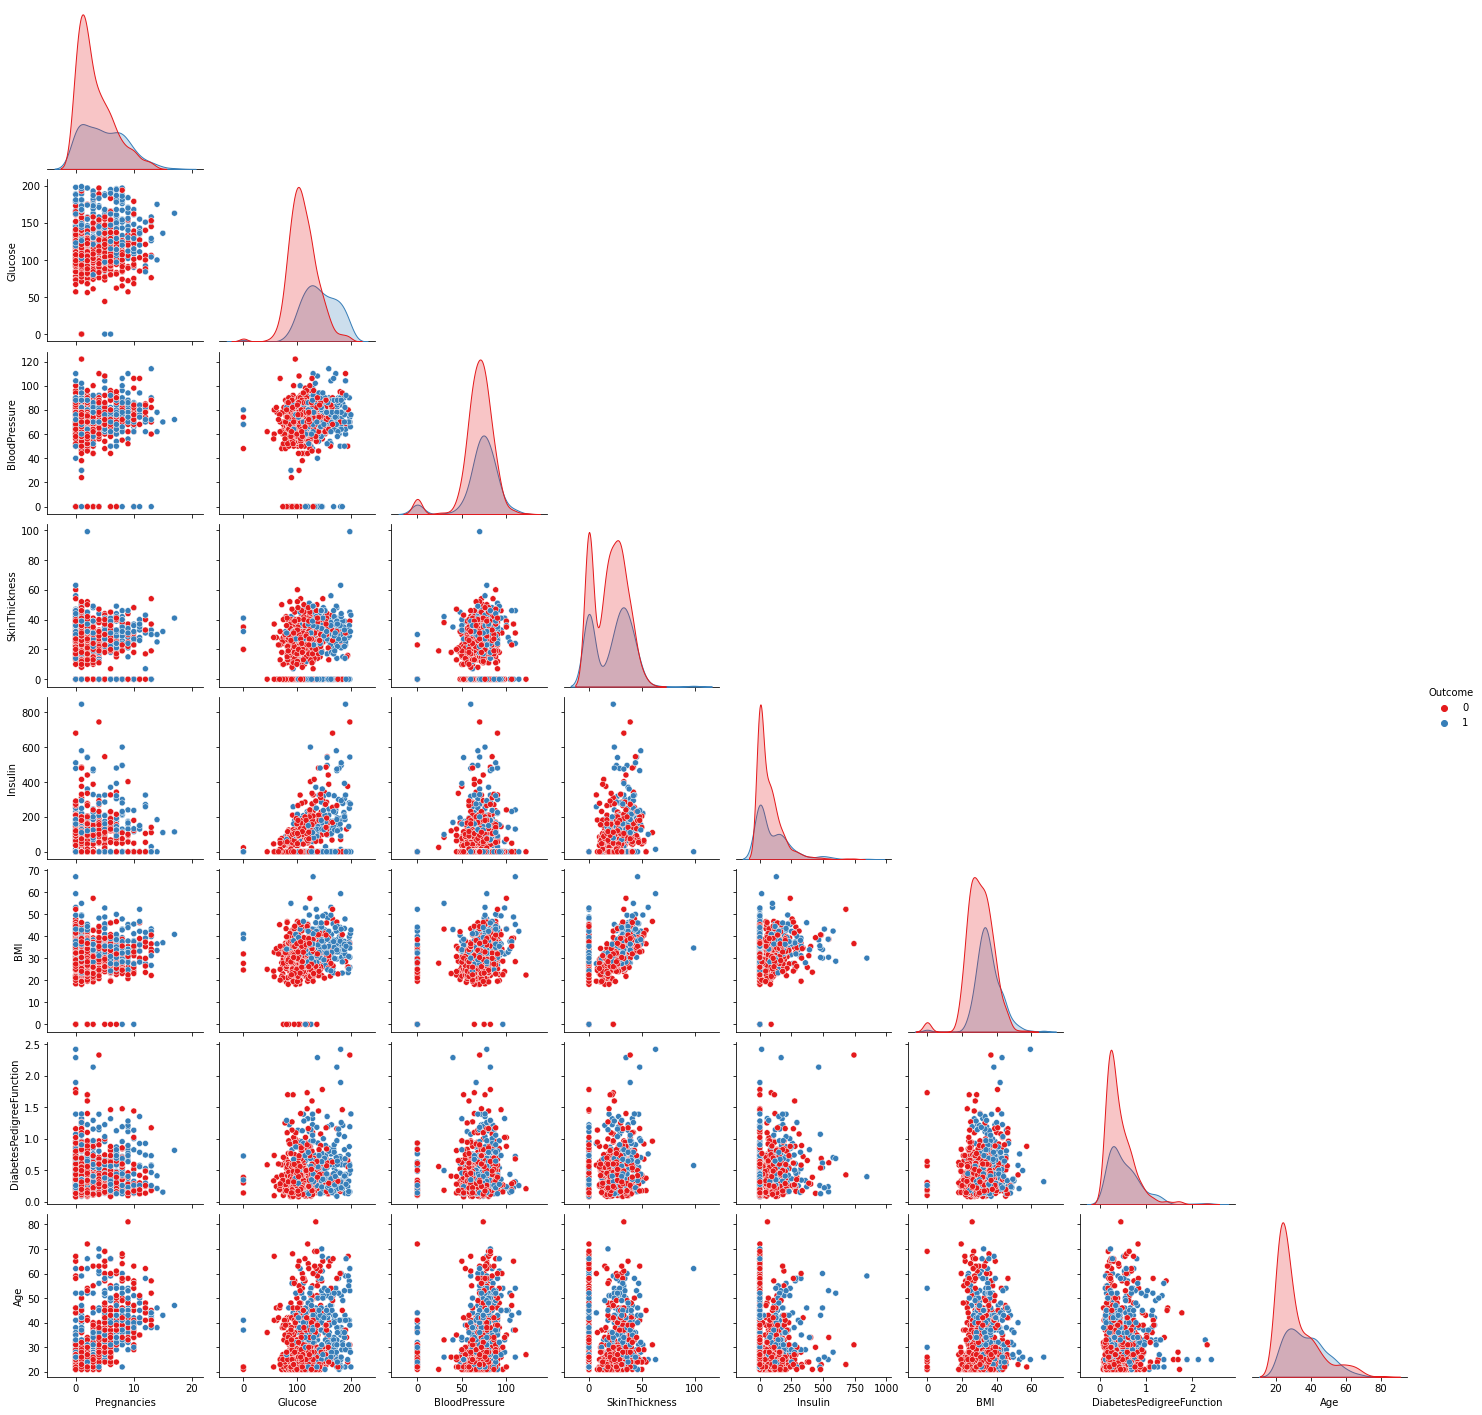

In [22]:
sns.set_palette(sns.color_palette("Set1", 8))
sns.pairplot(data=diabetes,hue="Outcome",corner=True)
plt.show()

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

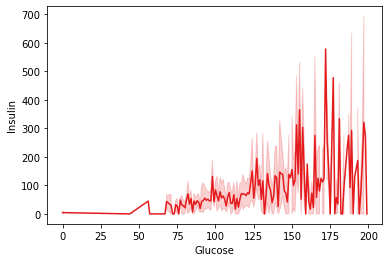

In [23]:
sns.lineplot(x='Glucose', y= 'Insulin', data=diabetes)

In [24]:
from sklearn import metrics
from sklearn.metrics import  classification_report, accuracy_score, precision_score, recall_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,plot_confusion_matrix 
plt.style.use('ggplot')

In [ ]:
from sklearn.model_selection import train_test_split
X = diabetes.drop(columns = 'Outcome')
y = diabetes['Outcome']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=42)


## KNN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [28]:
y_pred=knn.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [29]:
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",knn.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       168
           1       0.61      0.41      0.49        86

    accuracy                           0.71       254
   macro avg       0.68      0.64      0.64       254
weighted avg       0.70      0.71      0.69       254

Confusion Matrix:
 [[146  22]
 [ 51  35]]
Training Score:
 77.62645914396887
Mean Squared Error:
 0.2874015748031496
R2 score is:
 -0.2833610188261355


In [30]:
print(accuracy_score(y_test,y_pred)*100)


71.25984251968504


In [36]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy of K-NN classifier on training set: 0.78
Accuracy of K-NN classifier on test set: 0.71


# # Decision tree

In [37]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=8, random_state=100,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=100)

In [38]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77       168
           1       0.56      0.72      0.63        86

    accuracy                           0.72       254
   macro avg       0.70      0.72      0.70       254
weighted avg       0.74      0.72      0.72       254

Confusion Matrix:
 [[120  48]
 [ 24  62]]
Training Score:
 89.29961089494164
Mean Squared Error:
 0.28346456692913385
R2 score is:
 -0.2657807308970104


In [41]:
print(accuracy_score(y_test,y_pred)*100)

71.65354330708661


In [46]:
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy on training set: 0.893
Accuracy on test set: 0.717


# # Support vector machine

In [48]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [49]:
y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.77      0.88      0.82       168
           1       0.67      0.49      0.56        86

    accuracy                           0.74       254
   macro avg       0.72      0.68      0.69       254
weighted avg       0.73      0.74      0.73       254

Confusion Matrix:
 [[147  21]
 [ 44  42]]
Training Score:
 78.01556420233463
Mean Squared Error:
 0.2559055118110236
R2 score is:
 -0.1427187153931344


In [50]:
print(accuracy_score(y_test,y_pred)*100)

74.40944881889764


In [51]:
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy on training set: 0.780
Accuracy on test set: 0.744


# # Naive bayes

In [53]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [54]:
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80       168
           1       0.61      0.63      0.62        86

    accuracy                           0.74       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.74      0.74      0.74       254

Confusion Matrix:
 [[133  35]
 [ 32  54]]
Training Score:
 76.65369649805449
Mean Squared Error:
 0.2637795275590551
R2 score is:
 -0.17787929125138469


In [58]:
print(accuracy_score(y_test,y_pred)*100)

73.62204724409449


In [60]:
print("Accuracy on training set: {:.3f}".format(gnb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy on training set: 0.767
Accuracy on test set: 0.736


# # Gradient boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [63]:
y_pred=gbc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       168
           1       0.60      0.64      0.62        86

    accuracy                           0.73       254
   macro avg       0.70      0.71      0.71       254
weighted avg       0.74      0.73      0.73       254

Confusion Matrix:
 [[131  37]
 [ 31  55]]
Training Score:
 94.74708171206225
Mean Squared Error:
 0.2677165354330709
R2 score is:
 -0.19545957918050982


In [64]:
print(accuracy_score(y_test,y_pred)*100)

73.22834645669292


In [65]:
print("Accuracy on training set: {:.3f}".format(gbc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_test,y_pred)))

Accuracy on training set: 0.947
Accuracy on test set: 0.732


# # Neural network

In [66]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.77
Accuracy on test set: 0.70


In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.835
Accuracy on test set: 0.740


In [72]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.804
Accuracy on test set: 0.748
